---
$1.$ Usando a equação de Klein-Gordon, $\partial_{\mu}\partial^{\mu}\psi+(m_{0}^{2}c^{2}/\hbar^{2})\psi=0,$ verifique que $j^{\mu} = \frac{i\hbar}{2m_{0}c}\left(\psi^{*}\partial^{\mu}\psi-\psi\partial^{\mu}\psi^{*}\right)$ satisfaz a equação da continuidade $\partial_{\mu}j^{\mu}=0$.

_SOL._ Consideremos a equação de Klein-Gordon, 
$$\partial_{\mu}\partial^{\mu}\psi+(m_{0}^{2}c^{2}/\hbar^{2})\psi=0,$$
e o complexo conjugado desta equação
$$\partial_{\mu}\partial^{\mu}\psi^{*}+(m_{0}^{2}c^{2}/\hbar^{2})\psi^{*}=0.$$
Seguindo, multiplicamos estas equações, respectivamente, por $\psi^{*}$ e por $\psi$, obtendo assim
$$\psi^{*}\partial_{\mu}\partial^{\mu}\psi + (m_{0}^{2}c^{2}/\hbar^{2})|\psi|^{2}=0,$$
e
$$\psi\partial_{\mu}\partial^{\mu}\psi^{*}+(m_{0}^{2}c^{2}/\hbar^{2})|\psi|^{2}=0.$$
Subtraindo essas duas equações, vemos que
$$\psi^{*}\partial_{\mu}\partial^{\mu}\psi - \psi\partial_{\mu}\partial^{\mu}\psi^{*} = 0.$$
Notemos ainda que
\begin{align}
\big(\partial^{\mu}\psi\big)\big(\partial_{\mu}\psi^{*}\big) & = \big(g^{\mu\nu}\partial_{\nu}\psi\big)\big(g_{\mu\xi}\partial^{\xi}\psi^{*}\big) \\
& = g^{\mu\nu}g_{\mu\xi}\big(\partial_{\nu}\psi\big)\big(\partial^{\xi}\psi^{*}\big) \\
& = g^{\nu\mu}g_{\mu\xi}\big(\partial_{\nu}\psi\big)\big(\partial^{\xi}\psi^{*}\big) \\
& = \delta^{\nu}_{\xi}\big(\partial_{\nu}\psi\big)\big(\partial^{\xi}\psi^{*}\big) \\
& = \big(\partial_{\nu}\psi\big)\big(\partial^{\nu}\psi^{*}\big),
\end{align}
em que usamos que $\partial_{\nu}g_{\mu\xi}=0$ para a métrica do espaço euclidiano. Consideremos agora a derivada covariante da densidade de corrente de probabilidade:
\begin{align}
\partial_{\mu}j^{\mu} & = \frac{i\hbar}{2m_{0}c}\Big(\partial_{\mu}\big(\psi^{*}\partial^{\mu}\psi\big) - \partial_{\mu}\big(\psi\partial^{\mu}\psi^{*}\big)\Big) \\
 & = \frac{i\hbar}{2m_{0}c}\Big(\big(\partial_{\mu}\psi^{*}\big)\big(\partial^{\mu}\psi\big) + \psi^{*}\partial_{\mu}\partial^{\mu}\psi - \big(\partial_{\mu}\psi\big)\big(\partial^{\mu}\psi^{*}\big)  - \psi\partial_{\mu}\partial^{\mu}\psi^{*}\Big) \\
& = 0,
\end{align}
como queríamos demonstrar.

---
$2.$ Verifique que as 16 matrizes $\{I_4,\gamma^\mu,\sigma^{\mu,\nu},\gamma^5\gamma^\mu,\gamma^5\}$ são linearmente independentes, em que
$\gamma^5=i\gamma^0\gamma^1\gamma^2\gamma^3$, $\sigma^{\mu\nu} = i[\gamma^\mu,\gamma^\nu]/2$ pra $\mu<\nu$ e $\mu,\nu=0,1,2,3.$ Isso implica que qualquer matriz $M$ de dimensão $16\times 16$ pode ser escrita como uma combinação linear das matrizes desse conjunto: $A = aI_4 + b_\mu\gamma^\mu + c_{\mu\nu}\sigma^{\mu,\nu} + d_\mu\gamma^5\gamma^\mu e\gamma^5.$ Obtenha os coeficientes $\{a,b_\mu,c_{\mu\nu},d_\mu,e\}$ em termos dos elementos de matriz de $A$.
Dica. Use o produto interno de Hilbert-Schmidt, para verificar que estas matrizes são ortogonais e para obter os coeficientes. Use o sympy para te ajudar com as contas. 

_SOL._ Como vemos usando o código abaixo, as matrizes do conjunto acima são mutuamente ortogonais sob o produto interno de Hilbert-Schmidt, e portanto são mutuamente ortogonais.

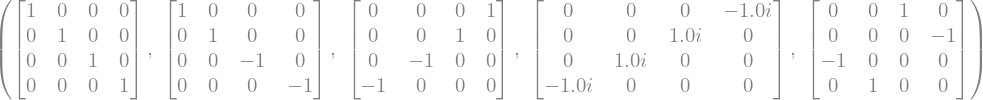

In [8]:
from sympy import Matrix, init_printing, trace, conjugate
init_printing(use_unicode=True)
I4 = Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
def gama(mu):
    if mu == 0:
        return Matrix([[1,0,0,0],[0,1,0,0],[0,0,-1,0],[0,0,0,-1]])
    elif mu == 1:
        return Matrix([[0,0,0,1],[0,0,1,0],[0,-1,0,0],[-1,0,0,0]])
    elif mu == 2:
        return Matrix([[0,0,0,-1j],[0,0,1j,0],[0,1j,0,0],[-1j,0,0,0]])
    elif mu == 3:
        return Matrix([[0,0,1,0],[0,0,0,-1],[-1,0,0,0],[0,1,0,0]])
    
I4, gama(0), gama(1), gama(2), gama(3)

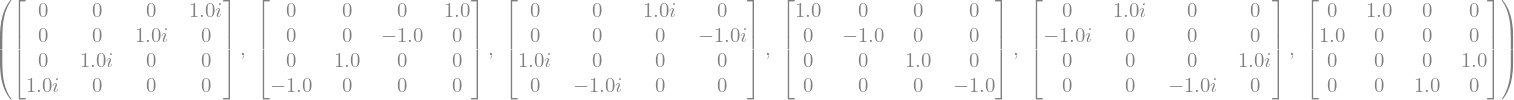

In [9]:
def comm(x,y):
    return x*y - y*x

def sig(mu,nu):
    return 1j*comm(gama(mu),gama(nu))/2

sig(0,1), sig(0,2), sig(0,3), sig(1,2), sig(1,3), sig(2,3)    

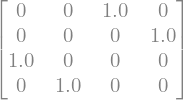

In [10]:
g5 = 1j*gama(0)*gama(1)*gama(2)*gama(3); g5

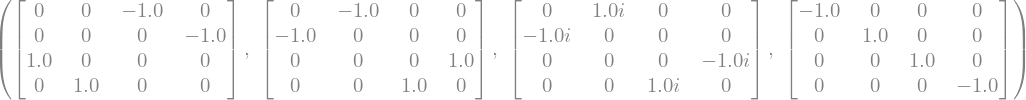

In [11]:
g5*gama(0), g5*gama(1), g5*gama(2), g5*gama(3)

In [12]:
list_gama = [I4, gama(0), gama(1), gama(2), gama(3), sig(0,1), sig(0,2), sig(0,3), sig(1,2), sig(1,3), sig(2,3), g5*gama(0), g5*gama(1), g5*gama(2), g5*gama(3), g5]
for j in range(0,16):
    for k in range(0,16):
        if j != k:
            tr = trace(conjugate(list_gama[j])*list_gama[k])
            if tr != 0:
                print(tr)

In [13]:
for j in range(0,16):
    for k in range(0,16):
        if j == k:
            tr = trace(conjugate(list_gama[j])*list_gama[k])
            print(trace(list_gama[j]*list_gama[k]))

4
4
-4
-4.00000000000000
-4
-4.00000000000000
-4.00000000000000
-4.00000000000000
4.00000000000000
4.00000000000000
4.00000000000000
-4.00000000000000
4.00000000000000
4.00000000000000
4.00000000000000
4.00000000000000


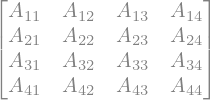

In [14]:
from sympy import symbols
A11,A12,A13,A14,A21,A22,A23,A24,A31,A32,A33,A34,A41,A42,A43,A44 = symbols('A11 A12 A13 A14 A21 A22 A23 A24 A31 A32 A33 A34 A41 A42 A43 A44')
A = Matrix([[A11,A12,A13,A14],[A21,A22,A23,A24],[A31,A32,A33,A34],[A41,A42,A43,A44]])
A

In [15]:
for j in range(0,16):
    coeff = trace(conjugate(list_gama[j])*A)
    print(coeff)

A11 + A22 + A33 + A44
A11 + A22 - A33 - A44
-A14 - A23 + A32 + A41
1.0*I*A14 - 1.0*I*A23 - 1.0*I*A32 + 1.0*I*A41
-A13 + A24 + A31 - A42
-1.0*I*A14 - 1.0*I*A23 - 1.0*I*A32 - 1.0*I*A41
-1.0*A14 + 1.0*A23 - 1.0*A32 + 1.0*A41
-1.0*I*A13 + 1.0*I*A24 - 1.0*I*A31 + 1.0*I*A42
1.0*A11 - 1.0*A22 + 1.0*A33 - 1.0*A44
1.0*I*A12 - 1.0*I*A21 + 1.0*I*A34 - 1.0*I*A43
1.0*A12 + 1.0*A21 + 1.0*A34 + 1.0*A43
1.0*A13 + 1.0*A24 - 1.0*A31 - 1.0*A42
-1.0*A12 - 1.0*A21 + 1.0*A34 + 1.0*A43
1.0*I*A12 - 1.0*I*A21 - 1.0*I*A34 + 1.0*I*A43
-1.0*A11 + 1.0*A22 + 1.0*A33 - 1.0*A44
1.0*A13 + 1.0*A24 + 1.0*A31 + 1.0*A42


---
$4.$ Considerando as matrizes de Pauli $\sigma_1=\begin{bmatrix}0&1\\1&0\end{bmatrix},\ \sigma_2=\begin{bmatrix}0&-i\\i&0\end{bmatrix},\ \sigma_3=\begin{bmatrix}1&0\\0&-1\end{bmatrix}$ e a matriz identidade $\sigma_0=\begin{bmatrix}1&0\\0&1\end{bmatrix}$, para as quais segue que $\sigma_j^2=\sigma_0$ para $j=0,1,2,3$ e $\sigma_j\sigma_k=\sum_l i\epsilon_{jkl}\sigma_l$ para $j\ne k$, verifique que $(\vec{v}\cdot\vec{\sigma})(\vec{w}\cdot\vec{\sigma}) = (\vec{v}\cdot\vec{w})\sigma_0 + i\vec{\sigma}\cdot(\vec{v}\times\vec{w}),$ em que $\vec{v},\vec{w}\in\mathbb{R}^3.$

_SOL._ Usando que o produto vetorial é
$$\vec{v}\times\vec{w} = \sum_j\hat{e}_j(\vec{v}\times\vec{w})_j = \sum_j\hat{e}_j\sum_{k,l} \epsilon_{jkl}v_k w_l,$$
e o produto escalar é
$$\vec{v}\cdot\vec{w} = \sum_j v_j w_j$$
teremos que
\begin{align}
(\vec{v}\cdot\vec{\sigma})(\vec{w}\cdot\vec{\sigma}) & = \sum_j v_j\sigma_j\sum_k v_k\sigma_k \\
& = \sum_{j=k} v_j\sigma_j w_k\sigma_k + \sum_{j\ne k} v_j\sigma_j w_k\sigma_k  \\
& = \sum_{j} v_j w_j\sigma_j^2 + \sum_{j\ne k}\sigma_j\sigma_k v_j w_k  \\
& = \sum_{j} v_j w_j\sigma_0 + \sum_{j\ne k}\sum_l i\epsilon_{jkl}\sigma_l v_j w_k  \\
& =(\vec{v}\cdot\vec{w})\sigma_0 + \sum_l i\sigma_l\sum_{j\ne k}\epsilon_{jkl} v_j w_k  \\
& =(\vec{v}\cdot\vec{w})\sigma_0 + \sum_l i\sigma_l\sum_{j\ne k}\epsilon_{ljk} v_j w_k  \\
& =(\vec{v}\cdot\vec{w})\sigma_0 + i\sum_l \sigma_l(\vec{v}\times\vec{w})_l  \\
& =(\vec{v}\cdot\vec{w})\sigma_0 + i\vec{\sigma}\cdot(\vec{v}\times\vec{w}).
\end{align}